# **NYC TLC EDA & Tableau Dashboard**

<br>Conduct EDA and create data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. 
<br>The management team is asking for a Python notebook showing data structuring and cleaning, 
<br>as well as any matplotlib/seaborn visualizations plotted to help understand the data. 
<br>At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

<br>Additionally, the management team has recently asked all EDA to include Tableau visualizations. 
<br>For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month.


# Exploratory data analysis


**The purpose** of this project is to conduct exploratory data analysis on a provided data set.
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results



# **Visualize a story in Tableau and Python**

Make a boxplot. outliers could skew our model, so depending on the distribution and occurance of outliers, we may want to drop them. Communication is key here.

### Imports, links, and loading

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import timedelta as td
import plotly.express as px

In [2]:
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

### Task 2a. Data exploration and cleaning

Decide which columns are applicable
<br> Identify outliers or unusual data
<br> Use visualizations to plot data distributions

In [3]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
df.shape

(22699, 18)

In [5]:
df.describe(include = 'all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


The standard deviation of total amount is nearly as large as the mean! The outliers we identified in our preliminary exploration are really skewing the descriptive statistics.

**A map visualization will not be possible without getting geolocation data for these LocationID's.**
<br> **Ask the team to communicate with the stakeholders about this.**
<br> For now I can group data by location ID to show relationships, but I can't create a map with what we've been given.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Perform a check for outliers on relevant columns sucah as 
<br>total amount
<br>trip distance
<br>trip duration
<br>change data type of datetime columns when we begin to work with duration


**Explore Total Amount variable**

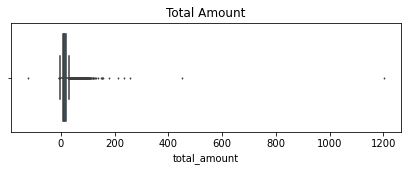

In [7]:
plt.figure(figsize = (7,2))
plt.title('Total Amount')
sns.boxplot(x = df['total_amount'], fliersize = 1)

1,200 looks like an extremem outlier. Same with the trip above $400, and the negative value to the left of 0. 
<br>Lets plot a histogram from 0-200 to get a better idea of our distribution

Text(0.5, 1.0, 'Total Amount Histogram')

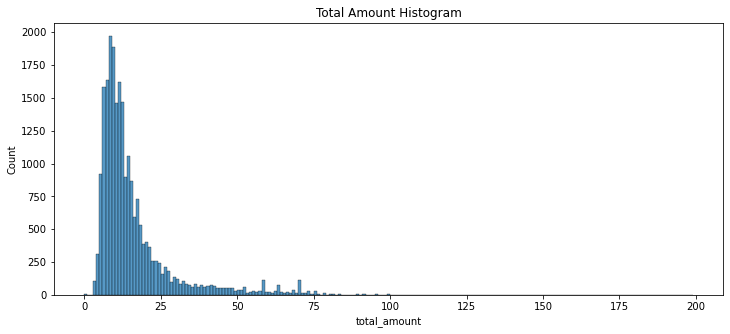

In [8]:
plt.figure(figsize = (12,5))
sns.histplot(df['total_amount'], bins = range(0, 200, 1))
plt.title('Total Amount Histogram')

Lets narrow it further to 0-100, and bin the amount in $1 increments

Text(0.5, 1.0, 'Total Amount Histogram')

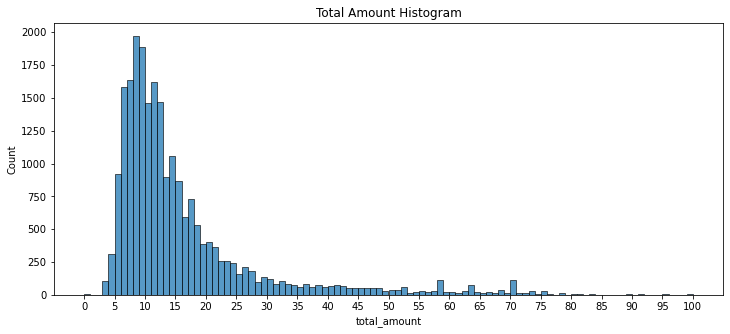

In [9]:
plt.figure(figsize = (12,5))
ax = sns.histplot(df['total_amount'], bins = range(0, 101, 1))
ax.set_xticks(range(0, 101, 5))
ax.set_xticklabels(range(0, 101, 5))
plt.title('Total Amount Histogram')

In [ ]:
Narrow view of the boxplot

(-5.0, 32.0)

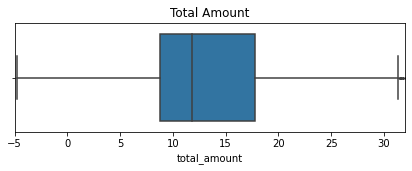

In [10]:
plt.figure(figsize = (7,2))
plt.title('Total Amount')
sns.boxplot(x = df['total_amount'], fliersize = 1)
plt.xlim(-5, 32)

To eliminate outliers beyond the whiskers of our boxplot, we can create a new dataframe filtering total_amount between values greater than 0 to less than or equal to $32

**Explore Trip Distance variable**

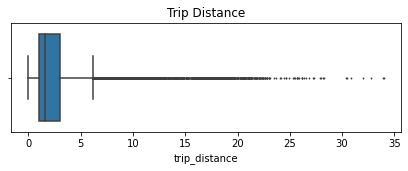

In [11]:
#create a boxplot of trip_distance
plt.figure(figsize = (7,2))
plt.title('Trip Distance')
sns.boxplot(x = df['trip_distance'], fliersize = 1)

Looks like a lot of outliers. Lets plot a histogram to look further into the distribution.

Text(0.5, 1.0, 'Trip Distance Histogram')

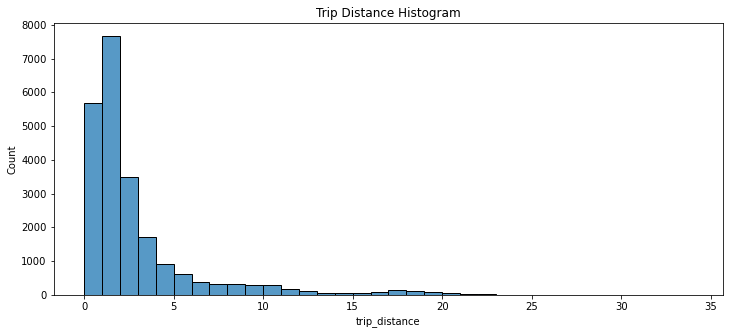

In [12]:
plt.figure(figsize = (12,5))
sns.histplot(df['trip_distance'], bins = range(0, 35, 1))
plt.title('Trip Distance Histogram')

We can see that any trip distances past 23 don't even register on the histogram.
<br>Most trips are 0-2 miles. 3-6 miles also contain a large proportion of trips.
<br>Tableau will allow us to break these into smaller bins to get a better view of the distribution

(-2.0, 7.0)

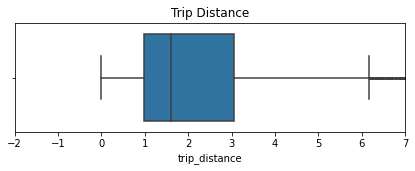

In [13]:
plt.figure(figsize = (7,2))
plt.title('Trip Distance')
sns.boxplot(x = df['trip_distance'], fliersize = 1)
plt.xlim(-2,7)

To eliminate outliers beyond the whiskers of our boxplot we can create a new dataframe:
    1. filtering total_amount between values greater than 0 to less than or equal to $32
    2. filter trip_distance between 0 to less than or equal to 6.2 miles

**Create and Explore Trip Duration variable**
<br>Convert Date clumns into a usable dtype for future use.
<br>Create box plot and histogram

In [14]:
#convert datetime columns into the correct format
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])

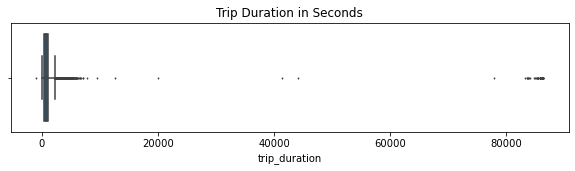

In [15]:
#create a new column for trip_duration
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'] 
# convert the time delta object to an integer of total seconds
df['trip_duration'] = df['trip_duration'].dt.total_seconds()

#boxplot
plt.figure(figsize = (10,2))
plt.title('Trip Duration in Seconds');
sns.boxplot(data = None, x=df['trip_duration'], fliersize = 1)

There's a cluster of long trips. 80,000 seconds is about 22 hours 15 minutes.

Text(0.5, 1.0, 'Trip Duration Histogram')

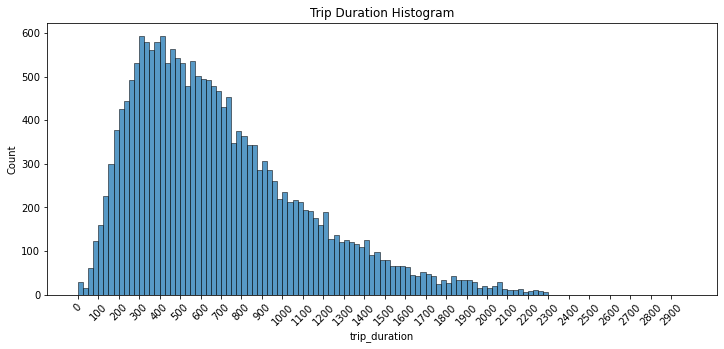

In [83]:
#create a narrow view histogram to look at the distribution of trip duration
plt.figure(figsize = (12,5))
#name the plot ax as a shortcut, set ranges.
ax = sns.histplot(df_filter['trip_duration'], bins = range(0, 3000, 25))
ax.set_xticks(range(0, 3000, 100))
ax.set_xticklabels(range(0, 3000, 100), rotation = 45)
plt.title('Trip Duration Histogram')

(-100.0, 2200.0)

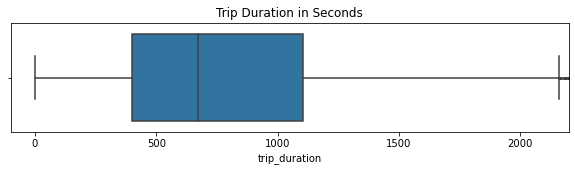

In [16]:
#boxplot with a more narrow view.
plt.figure(figsize = (10,2))
plt.title('Trip Duration in Seconds');
sns.boxplot(data = None, x=df['trip_duration'], fliersize = 1)
plt.xlim(-100,2200)

To eliminate outliers beyond the whiskers of our boxplot we can create a new dataframe:
    1. filtering total_amount between values greater than 0 and less than or equal to $32
    2. filter trip_distance between values greater than 0 and less than or equal to 6.2 miles
    3. filter trip duration between values greater than 0 and less than or equal to 2300 seconds

In [17]:
df_filtered = df[(df['total_amount'] > 0) & (df['total_amount'] <+ 32)]

In [18]:
df_filter2 = df_filtered[(df_filtered['trip_distance'] > 0) & (df_filtered['trip_distance'] <= 6.2)]

In [19]:
df_filter = df_filter2[(df_filter2['trip_duration'] > 0) & (df_filter2['trip_duration'] <= 2300)]

Lets compare descriptive stats from the complete and filtered data to see if anything jumps out at us.

In [20]:
df.describe(include = 'all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2017-07-03 15:45:19,2017-10-18 20:07:45,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2017-01-01 00:08:25,2017-01-01 00:17:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,1020.826600
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,3719.788923
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-1019.000000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,399.000000


We can see the dates are between 2017/01/01 and 2017/12/31
<br>Mean trip duration is 1020 seconds, or 17 minutes, but the Q2 (50% percentile) is 671 seconds. 
<br>Outliers are probably affecting this data. 
<br>the standard deviation seems high at over an hour (3719 seconds). 
<br>The interquartile range is 704 seconds.
<br>That negative trip duration may be the same data point as the -$120 fare. 
<br>Discuss the plan for outliers with the team, move forward with a new data frame eliminating outliers for better visualizations.

In [21]:
df_filter.describe(include = 'all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,1.979200e+04,19792.000000,19792,19792,19792.000000,19792.000000,19792.000000,19792,19792.000000,19792.000000,19792.000000,19792.000000,19792.000000,19792.000000,19792.000000,19792.000000,1.979200e+04,19792.000000,19792.000000
unique,NaN,NaN,19781,19784,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2017-01-13 22:01:31,2017-06-14 14:46:12,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,19713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2017-01-01 00:08:25,2017-01-01 00:17:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.666252e+07,1.555477,NaN,NaN,1.637884,1.821741,1.000707,NaN,164.041229,163.373333,1.337005,9.677446,0.320963,0.499823,1.363458,0.010634,3.000000e-01,12.176189,691.225596
std,3.278346e+07,0.496925,NaN,NaN,1.283078,1.241766,0.047146,NaN,67.517959,69.414208,0.489296,4.468342,0.373192,0.009402,1.328013,0.251430,1.081385e-13,5.203740,415.427055
min,1.680300e+04,1.000000,NaN,NaN,0.000000,0.010000,1.000000,NaN,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,0.300000,1.000000
25%,2.825911e+07,1.000000,NaN,NaN,1.000000,0.900000,1.000000,NaN,113.000000,113.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,8.300000,376.000000


Mean trip duration is now 691, much closer to a Q2 of 606
<br> standard deviation is now 415.4 seconds compared to 3719 unfiltered
<br> Let's rerun the box plots using the filtered data frame

(-1.0, 33.0)

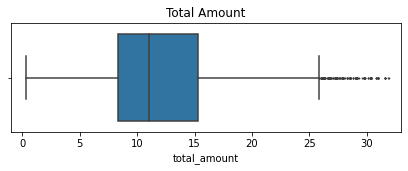

In [22]:
#filtered total_amout boxplot
plt.figure(figsize = (7,2))
plt.title('Total Amount')
sns.boxplot(x = df_filter['total_amount'], fliersize = 1)
#make the left whisker visible
plt.xlim(-1, 33)

(-1.0, 7.0)

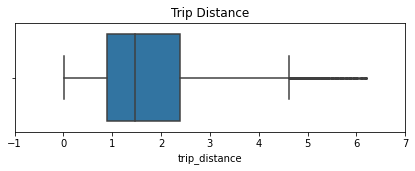

In [23]:
#filtered trip_distance boxplot
plt.figure(figsize = (7,2))
plt.title('Trip Distance')
sns.boxplot(x = df_filter['trip_distance'], fliersize = 1)
#make the left whisker visible
plt.xlim(-1,7)

(-20.0, 2350.0)

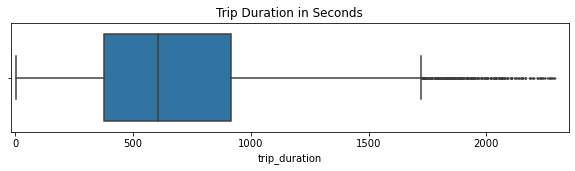

In [24]:
#filtered trip_duration boxplot
plt.figure(figsize = (10,2))
plt.title('Trip Duration in Seconds');
sns.boxplot(data = None, x=df_filter['trip_duration'], fliersize = 1)
#make the left whisker visible
plt.xlim(-20,2350)

Move on to some scatter plots

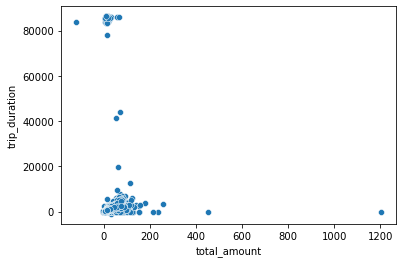

In [26]:
#scatter plot the relationship between trip duration and total amount
sns.scatterplot(x = df['total_amount'], y=df['trip_duration'])

Run that with the filtered data frame

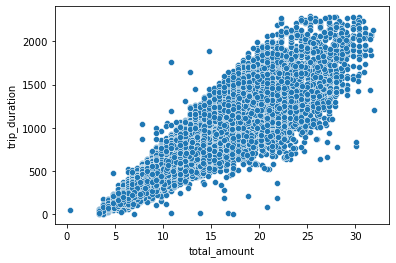

In [27]:
sns.scatterplot(x = df_filter['total_amount'], y=df_filter['trip_duration'])

Visualize Total Amount and Trip Distance relationship

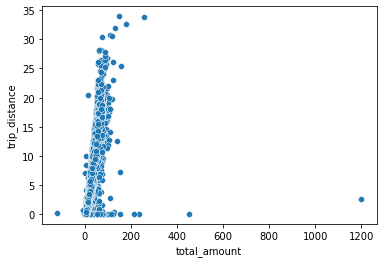

In [28]:
sns.scatterplot(x = df['total_amount'], y=df['trip_distance'])

visualization with the filtered dataframe

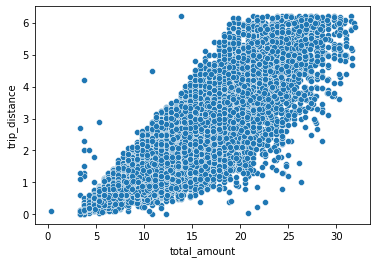

In [30]:
sns.scatterplot(x = df_filter['total_amount'], y=df_filter['trip_distance'])

Relationship between pickup location and trip_duration

In [31]:
#create dataframe grouped by Pickup Location, showing mean trip_duration
df.groupby('PULocationID')['trip_duration'].mean()

PULocationID
1        28.000000
4       758.966667
7       653.675676
10     4162.000000
12     1522.666667
          ...     
261    1731.792308
262    1024.976834
263     710.885204
264    1340.101449
265     389.785714
Name: trip_duration, Length: 152, dtype: float64

In [32]:
#sort by duration
df_location_duration = df.sort_values(by = ['trip_duration'], axis = 0, ascending = False)
df_location_duration.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
924,9397494,2,2017-02-09 23:24:58,2017-02-10 23:24:31,5,4.86,1,N,249,238,1,17.5,0.5,0.5,0.00,0.0,0.3,18.80,86373.0
15579,41838754,2,2017-05-10 18:53:53,2017-05-11 18:53:02,5,0.74,1,N,161,162,2,7.0,1.0,0.5,0.00,0.0,0.3,8.80,86349.0
14998,64882047,2,2017-07-31 14:04:25,2017-08-01 14:03:16,5,0.95,1,N,162,161,1,8.0,0.0,0.5,1.76,0.0,0.3,10.56,86331.0
22638,27567057,2,2017-04-03 21:02:49,2017-04-04 21:01:28,1,1.73,1,N,107,249,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30,86319.0
15163,30152527,2,2017-04-13 23:41:09,2017-04-14 23:39:42,2,1.99,1,N,239,166,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30,86313.0


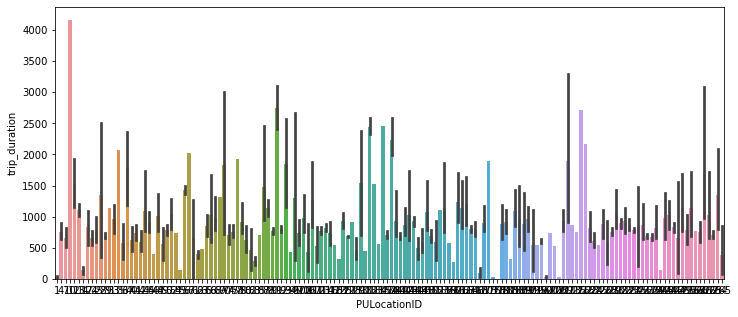

In [33]:
plt.figure(figsize = (12,5))
sns.barplot(data=df_location_duration, x=df_location_duration['PULocationID'], y=df_location_duration['trip_duration'])

While it's clear to see some pickup locations have a much higher average trip duration, we can make an interactive dashboard for stakeholders so they can choose what range of average trip durations to view.

**Explore relationship between relevant variables and each month of the year**

In [84]:
#extract months from tpep_pickup_datetime. we only need to work with one datetime column
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%B')
#establish month order for plots
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#test the code
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,844.0,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1590.0,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,432.0,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,1815.0,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,1003.0,April


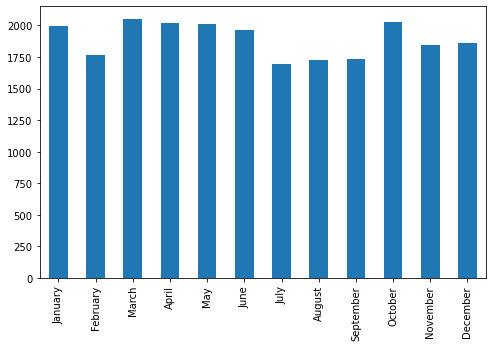

In [56]:
#plot to show count of trips for each month in month order
df['month'].value_counts().reindex(month_order).plot.bar(figsize = (8,5))

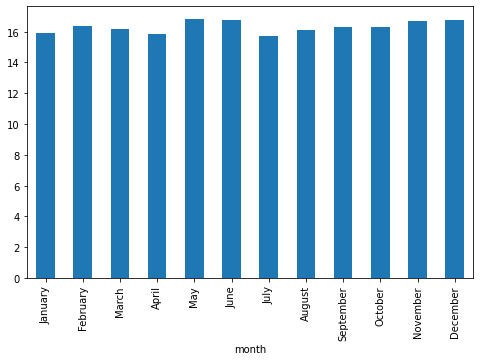

In [75]:
#create new dataframe grouped by plot, aggregating mean total amount
df_month_total_amount = df.groupby(['month']).agg({'total_amount': 'mean'})
#creat plot from ordered data frame
df_month_total_amount.reindex(month_order).plot.bar(y = ['total_amount'], figsize = (8,5), legend = False)

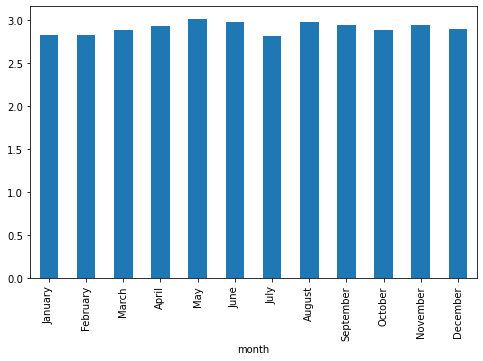

In [78]:
#create new aggregate dataframe of mean trip distance grouped by month
df_month_trip_dist = df.groupby(['month']).agg({'trip_distance': 'mean'})
#maintain month order in plot
df_month_trip_dist.reindex(month_order).plot.bar(y = ['trip_distance'], figsize = (8,5), legend = False)

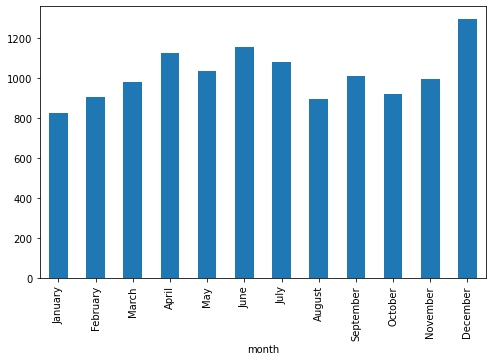

In [79]:
df_month_trip_dur = df.groupby(['month']).agg({'trip_duration': 'mean'})
df_month_trip_dur.reindex(month_order).plot.bar(y = ['trip_duration'], figsize = (8,5), legend = False)

trip_duration has the most variability between months. 
<br>total_amount and total_distance are nearly flat

This can be better controlled in an interactive tableau dashboard. Lets move to tableau to create a dashboard of these distributions, and time series relationships.